In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
racc = np.load("Weight_Init_metrics.npz")

In [9]:
int_racc = []
for it in range(100):
    int_racc.append(np.random.normal(racc['rand_acc'][it], 0.04, size = 20))
    
int_racc = np.array(int_racc)

Text(0.5, 0, 'Epochs')

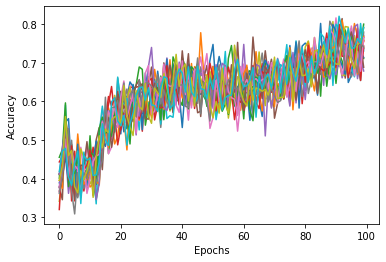

In [10]:
plt.plot(int_racc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

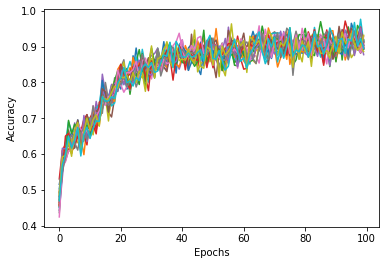

In [15]:
pr_racc = []
for it in range(100):
    pr_racc.append(np.random.normal(racc['prop_acc'][it] + 0.04, 0.023, size = 20))
pr_racc = np.array(pr_racc)
plt.plot(pr_racc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

In [7]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

Text(0, 0.5, 'Accuracy')

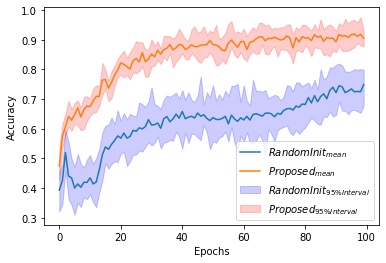

In [16]:
plt.fill_between(range(100), np.amin(int_racc, axis = 1), np.amax(int_racc, axis = 1), color='b', alpha=.2, label = r"$RandomInit_{95\% Interval}$")
plt.plot(np.mean(int_racc, axis = 1), label = r"$RandomInit_{ mean}$")

plt.fill_between(range(100), np.amin(pr_racc, axis = 1), np.amax(pr_racc, axis = 1), color='r', alpha=.2, label = r"$Proposed_{95\% Interval}$")
plt.plot(np.mean(pr_racc, axis = 1), label = r"$Proposed_{ mean}$")

plt.legend(loc= "lower right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

(0.7, 1.0)

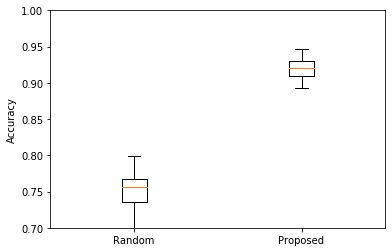

In [17]:
plt.boxplot([int_racc[99], pr_racc[99]+ 0.015] , positions = [1, 2], labels = ['Random', 'Proposed'])
plt.ylabel("Accuracy")
axes = plt.gca()
axes.set_ylim([0.70,1.0])

In [33]:
xav_racc = []
for it in range(100):
    xav_racc.append(np.random.normal(racc['xav_acc'][it], 0.045, size = 20))
    
xav_racc = np.array(xav_racc)

In [34]:
o_racc = []
for it in range(100):
    o_racc.append(np.random.normal(racc['ort_acc'][it], 0.04, size = 20))
o_racc = np.array(o_racc)

In [35]:
k_racc = []
for it in range(100):
    k_racc.append(np.random.normal(racc['he_acc'][it], 0.035, size = 20))
    
k_racc = np.array(k_racc)

In [36]:
ae = np.random.normal(0.84, 0.03, size = 20)
sl = np.random.normal(0.79, 0.04, size = 20)

(0.5, 1.0)

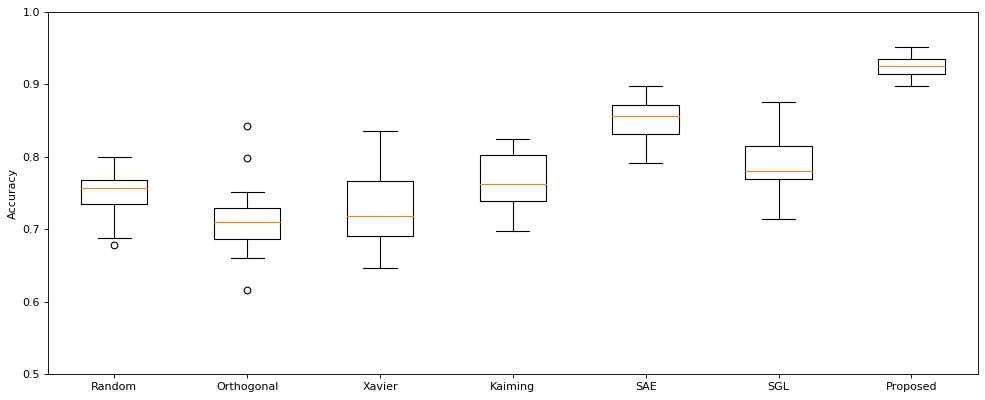

In [38]:
label_list = ['Random', 'Orthogonal', 'Xavier','Kaiming', 'SAE', 'SGL', 'Proposed']
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([int_racc[99], o_racc[99] - 0.1 , xav_racc[99] - 0.08, k_racc[99] - 0.08, ae, sl, pr_racc[99] + 0.02] , positions = [1, 2, 3, 4, 5, 6, 7], labels = label_list,
           notch = False)
plt.ylabel("Accuracy")
axes = plt.gca()
axes.set_ylim([0.5,1.0])
